## Package requirements

In [1]:
%pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 8.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 7.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 3.9 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Solution of the exercise

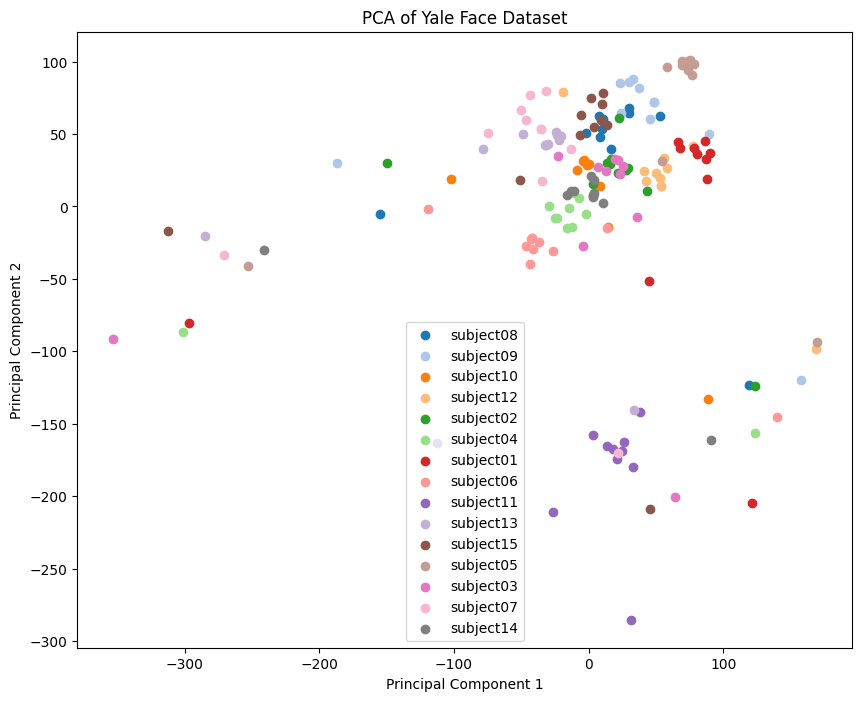

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the path to the Yale face dataset
dataset_path = 'YALE/centered'

# Function to load images and labels
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.pgm'):
            img = imread(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
                # Assuming the label is the first part of the filename
                label = filename.split('.')[0]
                labels.append(label)
    return images, labels

# Load images and labels
images, labels = load_images_from_folder(dataset_path)

# Flatten images and create the data matrix
data = np.array([img.flatten() for img in images])

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Plot the first two principal components
plt.figure(figsize=(10, 8))
unique_labels = list(set(labels))
colors = plt.get_cmap('tab20')

for i, label in enumerate(unique_labels):
    indices = [index for index, l in enumerate(labels) if l == label]
    plt.scatter(principal_components[indices, 0], principal_components[indices, 1], label=label, color=colors(i))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Yale Face Dataset')
plt.legend()
plt.show()
